# Boosting

**Boosting is an ensemble approach (meaning it involves several trees) that starts from a weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision-makers. The weights are assigned based on the performance of an individual tree.**
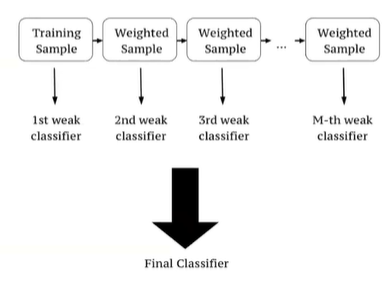
Ensemble parameters are calculated in stagewise way which means that while calculating the subsequent weight, the learning from the previous tree is considered as well.

### Weak classifier - why tree?

First what is a weak classifier? Weak classifier - slightly better than random guessing.
Any algorithm could have been used as a base for the boosting technique, but the reason for choosing trees are:

###### Pro's
- computational scalability,
- handles missing values, robust to outliers,
- does not require feature scaling,
- can deal with irrelevant inputs,
- interpretable (if small),
- handles mixed predictors as well (quantitive and qualitative)

###### Con's
- inability to extract a linear combination of features
- high variance leading to a small computational power

And that's where boosting comes into the picture. It minimises the variance by taking into consideration the results from various trees.

# Ada Boost (Adaptive Boosting)

###### Example

For understanding this algorithm, we'll use the folling simple dataset for heart patient prediction.

import pandas as pd
heart_data = pd.read_csv('heart_disease-test.csv')
heat_data

 - There are a total of 8 rows in our dataset. Hence, we'll initialize weights(w = 1/n) as 1/8 in the beginning. And, at the beginning, all the sample are equally important.
 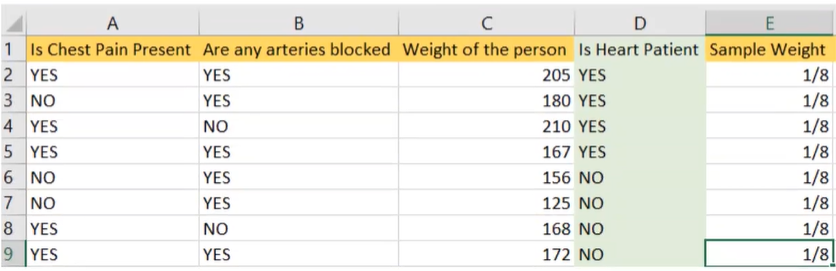
 - We'll consider the individual columns to create weak decision-makers as shown below and then try to figure out what are the correct and incorrect predictions based on that columns.
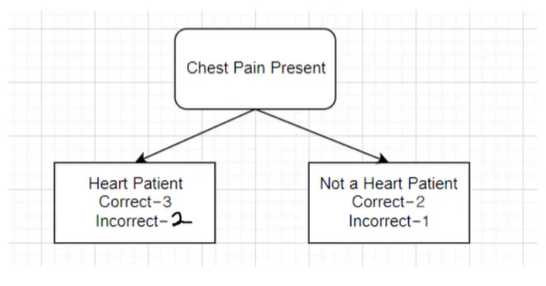
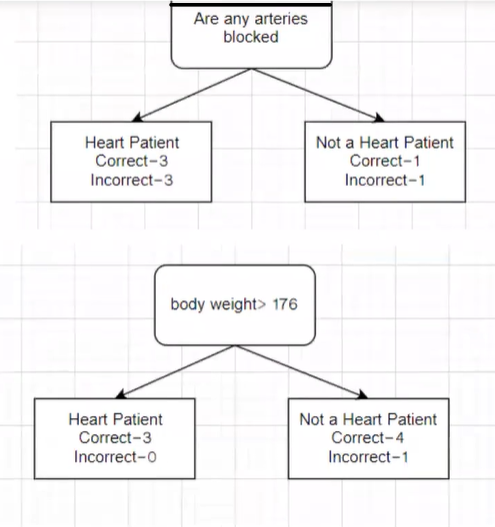

- We'll now calculate the Gini index of the individual stumps using the formula



G.I for chest pain tree= 0.47
G.I for blocked arteries tree= 0.5
G.I for body-weight tree= 0.2

And, we select the tree with the lowest Gini Index. This will be the first decision-make r for our model.

- Now, we'll calculate the contribution of this tree(stump) to our final decision using the formula:



As this stump classified only one data incorrectly out of the 8, hence the total error is 1/8.

Putting this into the formula we get contribution= 0.97

- We'll now calculate the new weights using the formula:
- **Increase** the sample weight for **incorrectly** classified datapoints New weight= old weighte^ contribution= 1/8 e^0.97=0.33 • - **Decrease** the sample weight for **correctly** classified datapoints New weight= old weighte^- contribution= 1/8 e^-0.97=0.05
- Populate the new weights as shown below:
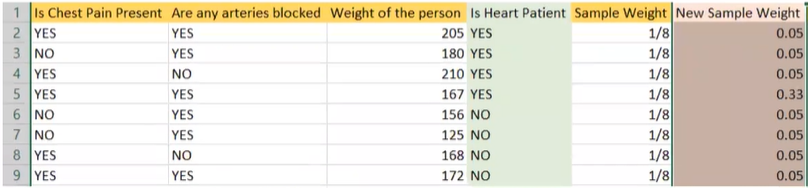
- Normalize the sample weights: If we add all the new sample weights, we get 0.68. Hence, for normalization we divide all the sample weights by 0.68 and then create normalized sample weights as shown below:
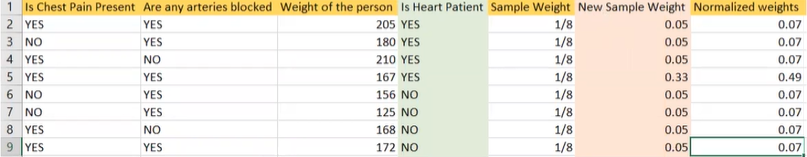

These new normalized weights will act as the sample weights for the next iteration.
- Then we create new trees which consider the dataset which was prepared using the new sample weights. 
- Suppose, m trees (stumps) are classifying a person as a heart patient and n trees(stumps) are classifying a person as a healthy one, then the contribution of m and n trees are added separately and whichever has the higher value, the person is classified as that.

For example, if the contribution of m trees is 1.2 and the contribution of n trees is 0.5 then the final result will go in the favour of m trees and the person will be classified as a heart patient.

# Python Implementation

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initializing the dataframe

data = pd.read_csv('boston_house_rent.csv')

In [3]:
# see head of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940 
- DIS weighted distances to five Boston employment centres 
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000usd PTRATIO pupil-teacher ratio by town
- B 1000(BK -0.63)^2 where BK is the proportion of blacks by town 
- LSTAT % lower status of the population

In [4]:
# Any missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
# Dataset analysis/stats using describe method.
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

In [7]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


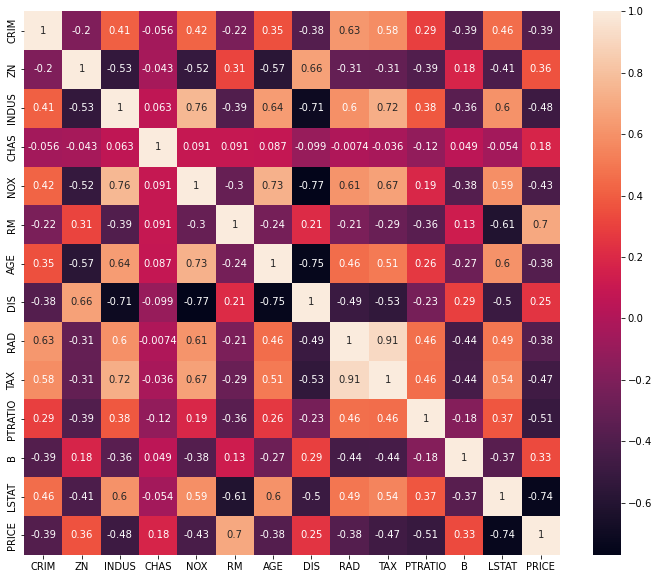

In [8]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(12,10))

sns.heatmap(corr,annot=True)
plt.show()

## Seems RAD and TAX are correlated. Lets check with scatter plot

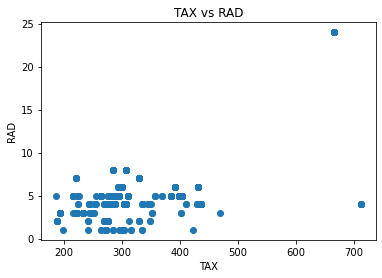

In [10]:
plt.scatter(data.TAX, data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX vs RAD')
plt.show()

**Since we cannot confirm with plot that there is a close relation. So we will not take risk and not deleting any features.**

In [11]:
# Dividing feature and label data.
x = data.drop(columns=['PRICE'], axis= 1)
y = data['PRICE']

In [12]:
# train test split (hold out method)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 100)

# AdaBoost model training

In [13]:
from sklearn.ensemble import AdaBoostRegressor

In [14]:
ada = AdaBoostRegressor()

In [15]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [16]:
# Model prediction on train data
y_pred = ada.predict(x_train)

In [20]:
y_pred[:6]  #example of it's prediction

array([18.86872038, 20.82202381, 20.93783784, 25.86574586, 20.82202381,
       25.30723404])

In [17]:
accuracy = metrics.r2_score(y_train, y_pred)
print ('R square score', accuracy)

R square score 0.9140871951364572


**Since model has already seen the data, so it is producing better score.**

In [18]:
# Predicting Test Data with the model

y_test_pred = ada.predict(x_test)

In [19]:
# Model Evaluation

accuracy = metrics.r2_score(y_test, y_test_pred)
print ('R square score:', accuracy)

R square score: 0.8371492839743577


### Hyperparameter Tuning using RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
params = {'n_estimators': [47,50,60,70], 'learning_rate':[0.25,0.30,0.40]}

In [24]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [25]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [26]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=60)

In [29]:
ada = AdaBoostRegressor(learning_rate=0.25,n_estimators=70)

ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)

print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,y_pred))

*****accuracy post tuning*****
0.8053789461447983
